In [1]:
# ds = load_dataset("OpenAssistant/oasst1")
# load dataset from local jsonl
path = "data/oasst/2023-04-12_oasst_all.messages.jsonl"
# path = "data/alpaca_data.json"

import pandas as pd

df = pd.read_json(path, lines=path.endswith("jsonl"))


In [2]:
# base_df = df[df["synthetic"]]
base_df = df
base_df.head()

,message_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,synthetic,emojis,labels,detoxify,message_tree_id,tree_state,parent_id,rank,model_name
0,6ab24d72-0181-4594-a9cd-deaf170242fb,c3fe8c76-fc30-4fa7-b7f8-c492f5967d18,2023-02-05T14:23:50.983374+00:00,Can you write a short introduction about the r...,prompter,en,3,1.0,False,False,"{'+1': 10, '_skip_reply': 1, '_skip_ranking': 4}","{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.00044308538781400006, 'severe_t...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,NaN,NaN,NaN
1,c8e83833-ecbc-44fe-b6db-735228c25a1c,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T13:50:44.657083+00:00,"""Monopsony"" refers to a market structure where...",assistant,en,3,1.0,False,False,"{'+1': 3, '_skip_labeling': 1}","{'spam': {'value': 0.0, 'count': 3}, 'fails_ta...","{'toxicity': 0.000263965659542, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,6ab24d72-0181-4594-a9cd-deaf170242fb,0.0,NaN
2,6708c47f-05c9-4346-b3d2-40b2bd24fde4,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T18:48:49.391686+00:00,Now explain it to a dog,prompter,en,3,1.0,False,False,NaN,"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.036484777927398, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,c8e83833-ecbc-44fe-b6db-735228c25a1c,NaN,NaN
3,343ee2d4-87ae-41fd-a768-bdd65959dc4a,49ddcb0d-6588-43bd-858d-19c577f12e7b,2023-02-06T13:37:56.044680+00:00,Monopsony is a market structure in which there...,assistant,en,3,1.0,False,False,"{'+1': 2, '_skip_reply': 1, '_skip_labeling': 2}","{'spam': {'value': 0.0, 'count': 3}, 'fails_ta...","{'toxicity': 0.0008866374846540001, 'severe_to...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,6ab24d72-0181-4594-a9cd-deaf170242fb,1.0,NaN
4,18145bf4-37fd-4ac0-80f5-6108b5f2b365,e10e99a0-38ac-4b07-bf5d-4427696e4e0d,2023-02-06T18:52:51.428543+00:00,How can one fight back when a monospony had be...,prompter,en,3,1.0,False,False,{'+1': 1},"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.000936213706154, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,343ee2d4-87ae-41fd-a768-bdd65959dc4a,NaN,NaN


In [3]:
len(base_df), base_df["user_id"].unique(), base_df["role"].unique()

(161443,
 array(['c3fe8c76-fc30-4fa7-b7f8-c492f5967d18',
        '2c96e467-66f0-4be7-9693-bda51356a424',
        '49ddcb0d-6588-43bd-858d-19c577f12e7b', ...,
        'e3b63c18-51a8-446c-983c-1803e5721001',
        'fcfec287-18bf-49f3-8e9b-0c48df590fc8',
        '55e23953-c333-4b02-a459-c99d2c7172a3'], dtype=object),
 array(['prompter', 'assistant'], dtype=object))

In [4]:
oasst_df = base_df[base_df["role"] == "assistant"]

from collections import Counter
Counter(oasst_df["model_name"])

Counter({nan: 62039,
         'chip20b': 3831,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=0.8,repetition_penalty=1.2,top_p=0.9': 309,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=1.0,repetition_penalty=1.2,typical_p=0.2': 292,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=1.0,repetition_penalty=1.2,top_k=50,top_p=0.95': 269,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=1.0,repetition_penalty=1.2,top_k=5,penalty_alpha=0.6': 257,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=0.8,repetition_penalty=1.2,typical_p=0.3': 228,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=False,temperature=1.0,repetition_penalty=1.2,num_b

In [5]:
base_df[~base_df["labels"].eq({})]["labels"].iloc[5]

{'spam': {'value': 0.0, 'count': 3},
 'fails_task': {'value': 0.0, 'count': 3},
 'lang_mismatch': {'value': 0.0, 'count': 3},
 'pii': {'value': 0.0, 'count': 3},
 'not_appropriate': {'value': 0.0, 'count': 3},
 'hate_speech': {'value': 0.0, 'count': 3},
 'sexual_content': {'value': 0.0, 'count': 3},
 'quality': {'value': 0.833333333333333, 'count': 3},
 'toxicity': {'value': 0.0, 'count': 3},
 'humor': {'value': 0.0, 'count': 3},
 'helpfulness': {'value': 0.833333333333333, 'count': 3},
 'creativity': {'value': 0.0, 'count': 3},
 'violence': {'value': 0.0, 'count': 3}}

In [6]:
# for row in oasst_df.iloc:
#     pid = row["parent_id"]
#     texts = [row["role"].upper() + ": " + row["text"]]
#     while not pd.isnull(pid):
#         parent = df[df["message_id"] == pid].iloc[0]
#         texts.append(parent["role"].upper() + ": " + parent["text"])
#         pid = parent["parent_id"]

#     texts.reverse()
#     transcript = "\n\n".join(texts)
#     print(transcript)
#     if input() == "q":
#         break
#     # clear console
#     print("\033[H\033[J")


In [7]:
# notes on truth-aptness
# - People often ask for fictions about real-world people. 
#   These fictions may produce misleading impressions of the 
#   people they are about, and are therefore important to study, 
#   but should probably be excluded (FICTIONAL)
# - Full context (prompter) will probably be necessary for all statements because of e.g. unresolved antecedents
# - Code is generally not truth apt. But a description of the code is. (CODE)
# - Some statements are literally truth-apt, but are more idiomatic/stylistic (e.g. "The difficulty in
#   instantly coming up with the name of a familiar object may be due to several factors") (STYLISTIC)
# - Hedging subtly changes the truth value of a sentence (HEDGING)
# - Some statements are commands imply something about the world, but are not themselves truth-apt (e.g. "Use mnemonic
#   devices or other strategies to associate the object with its name.") (COMMAND) (IMPLICIT)
# - Some are normative

# I'm starting to think we should just have an interrogator instance of the model. This is similar to the reward model,
# in which there is a more standardized format for the propositions
# But this interrogator might be just as good as the ELK probe on the interrogator.
# What if we train the interrogator (defined as the model plus a certain context/prefix) to have the same
# ELK probe outputs on different paraphrases/syntactic variants of the same statement? This is similar to LEACEing away
# the paraphrase dimension or training prompt invariance, but this is optimizing against our generalization regularizer (eek!)

# I think we should aim to be able to do ELK on responses like the following, at all of the tokens concluding
# a sentence (not clause) that is truth apt.
"""
PROMPTER: Can you explain how solar panels work? Give an in-depth explanation of their mechanisms of action.

ASSISTANT: Solar cells convert sunlight directly into electricity. There are two main types of solar cells: silicon and thin film.

A single solar cell, also known as a photovoltaic (PV) module, consists of multiple layers of materials that absorb different parts of the light spectrum to produce electrons and holes. These particles then move through conductive channels and meet at the pn junction, which is where the current flows. Solar energy converts this flow of electrons into usable electrical power.

The basic structure of a silicon solar cell is a layer of silicon semiconductor material called a substrate, covered with a layer of aluminum metal and another layer of silicon semiconductor material. The front surface of the solar cell is exposed to the sun's rays, while the backside is connected to ground. When sunlight reaches the solar cell, it causes the electrons andholes to be created in the silicon layers. The electrons travel across the P–N interface and enter the collecting electrode on the back side of the solar cell, while the holes travel along the N–P interface and enter the bottom contact on the front side of the solar cell.

When there is enough sunlight, the voltage generated by the solar cell is high enough to provide power for various applications, such as homes or businesses. However, when the sun goes down or the temperature drops, the voltage generated by the solar cell drops too. To maintain a stable output voltage, some solar cells include a storage battery to capture excess electricity during peak demand hours and release it to the grid during low demand periods.

Thin film solar cells use a thinner layer of semiconducting material than traditional silicon solar cells. This allows them to be more efficient and cost-effective, especially for larger installations. Thin film solar cells also have a longer lifespan and can be used in a wider range of environments than silicon solar cells.

Overall, solar cells convert sunlight directly into electricity, providing a clean and renewable source of energy that can help reduce our dependence on fossil fuels. With continued research and development, solar technology continues to improve and become more affordable, making it a promising option for generating power in the future.
"""


"\nPROMPTER: Can you explain how solar panels work? Give an in-depth explanation of their mechanisms of action.\n\nASSISTANT: Solar cells convert sunlight directly into electricity. There are two main types of solar cells: silicon and thin film.\n\nA single solar cell, also known as a photovoltaic (PV) module, consists of multiple layers of materials that absorb different parts of the light spectrum to produce electrons and holes. These particles then move through conductive channels and meet at the pn junction, which is where the current flows. Solar energy converts this flow of electrons into usable electrical power.\n\nThe basic structure of a silicon solar cell is a layer of silicon semiconductor material called a substrate, covered with a layer of aluminum metal and another layer of silicon semiconductor material. The front surface of the solar cell is exposed to the sun's rays, while the backside is connected to ground. When sunlight reaches the solar cell, it causes the electron

# Get weak LM responses to Oasst prompts

In [4]:
# ds = load_dataset("OpenAssistant/oasst1")
# load dataset from local jsonl
# path = "data/oasst/2023-04-12_oasst_all.messages.jsonl"
path = "data/alpaca_data.json"

import pandas as pd
import uuid

df = pd.read_json(path, lines=path.endswith("jsonl"))
df["id"] = [str(uuid.uuid4()) for _ in range(len(df))]

In [5]:
df

,instruction,input,output,id
0,Give three tips for staying healthy.,,1.Eat a balanced diet and make sure to include...,9ef643ee-bd9c-42d2-ba56-7cf1e55659d0
1,What are the three primary colors?,,"The three primary colors are red, blue, and ye...",1d073e24-7423-4f9b-9612-92f825c3d3bb
2,Describe the structure of an atom.,,"An atom is made up of a nucleus, which contain...",861ecf43-eac6-4d96-ad14-48b063d16916
3,How can we reduce air pollution?,,There are a number of ways to reduce air pollu...,b38575a4-2d7b-4edc-9fcc-5b47765ab2ca
4,Describe a time when you had to make a difficu...,,I had to make a difficult decision when I was ...,62996ea6-a761-4fa5-8f9f-cfc7ba4ca667
...,...,...,...,...
51997,Generate an example of what a resume should li...,,"Jean Tremaine\n1234 Main Street, Anytown, CA 9...",2697e86e-8e2a-4149-9c9b-f5172f34760c
51998,Arrange the items given below in the order to ...,"cake, me, eating",I eating cake.,f31ba633-aa7c-4257-a078-f74d156d5554
51999,Write an introductory paragraph about a famous...,Michelle Obama,Michelle Obama is an inspirational woman who r...,787c127d-6f32-41fc-b1ec-56583ec5f87c
52000,Generate a list of five things one should keep...,,1. Research potential opportunities and carefu...,fb091797-88e3-4d5d-aa94-237ce61e8575


In [9]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel
device = "cuda:6"
# base_model_name = "EleutherAI/pythia-70M-deduped"
# base_model = AutoModelForCausalLM.from_pretrained(base_model_name)
# model_name = "peterchatain/rlhf-v3-sweep-pythia-70M"  this model is dead (doesn't load)
# model = PeftModel.from_pretrained(model=base_model, model_id=model_name).to(device).half()
# model_name = "vicgalle/gpt2-open-instruct-v1"  this model doesn't follow instructions
# model_name = "MayaPH/opt-flan-iml-6.7b" this model just starts throwing entailment questions back at me
# model_name = "vihangd/smartplat-3b-v1" I don't know the prompt for this one
# model_name = "microsoft/DialoGPT-large" # this model is pretty bad at following instructions
# model_name = "keyfan/bloomz-rlhf"  # this model is pretty good, though I'm unsure how accurate it is
model_name = "OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map={"": device})
if "pythia" in model_name:
    model = model.half()
model.eval()

/mnt/ssd-2/spar/alexm/miniconda3/envs/dlkb/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:24<00:00,  8.05s/it]


GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50288, 5120)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-35): 36 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((5120,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((5120,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=5120, out_features=15360, bias=True)
          (dense): Linear(in_features=5120, out_features=5120, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=5120, out_features=20480, bias=True)
          (dense_4h_to_h): Linear(in_features=20480, out_features=5120, bias=True)

In [10]:
prompter_df = df[(df["role"] == "prompter") & (df["lang"] == "en")]
prompter_df.head()

,message_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,synthetic,emojis,labels,detoxify,message_tree_id,tree_state,parent_id,rank,model_name
0,6ab24d72-0181-4594-a9cd-deaf170242fb,c3fe8c76-fc30-4fa7-b7f8-c492f5967d18,2023-02-05T14:23:50.983374+00:00,Can you write a short introduction about the r...,prompter,en,3,1.0,False,False,"{'+1': 10, '_skip_reply': 1, '_skip_ranking': 4}","{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.00044308538781400006, 'severe_t...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,NaN,NaN,NaN
2,6708c47f-05c9-4346-b3d2-40b2bd24fde4,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T18:48:49.391686+00:00,Now explain it to a dog,prompter,en,3,1.0,False,False,NaN,"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.036484777927398, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,c8e83833-ecbc-44fe-b6db-735228c25a1c,NaN,NaN
4,18145bf4-37fd-4ac0-80f5-6108b5f2b365,e10e99a0-38ac-4b07-bf5d-4427696e4e0d,2023-02-06T18:52:51.428543+00:00,How can one fight back when a monospony had be...,prompter,en,3,1.0,False,False,{'+1': 1},"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.000936213706154, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,343ee2d4-87ae-41fd-a768-bdd65959dc4a,NaN,NaN
6,ac94bfcf-7f25-4084-8755-dde345ac2323,3ef645f1-c9f7-49e0-8e53-3c9a9c440ca1,2023-02-06T16:44:30.360408+00:00,What can be done at a regulatory level to ensu...,prompter,en,3,1.0,False,False,"{'+1': 3, '-1': 1, '_skip_reply': 9, '_skip_ra...","{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.006290378980338, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,636dd191-50df-4894-ba9a-cd7f00767258,NaN,NaN
10,fc64fa35-08a8-422c-8f6c-2d86a2834aac,63321c74-d512-4221-96ef-04bd1f2d95fd,2023-02-06T16:26:47.581724+00:00,I would imagine this is similar or even the sa...,prompter,en,3,1.0,False,False,"{'+1': 1, '_skip_reply': 4, '_skip_labeling': 2}","{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.00028263000422100004, 'severe_t...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,636dd191-50df-4894-ba9a-cd7f00767258,NaN,NaN


In [11]:
# tokenizer.eos_token = "### End"
tokenizer.eos_token_id = tokenizer.convert_tokens_to_ids(tokenizer.eos_token)
print(tokenizer.eos_token_id)
max_length = model.config.max_position_embeddings
print("Max length:", max_length)
results = []

0
Max length: 2048


In [12]:
import torch
from itertools import islice
from tqdm import tqdm
import uuid
import os

n_examples = 6000
offset = 1000
with torch.no_grad():
    shuffled_df = prompter_df.sample(frac=1, random_state=633)
    # shuffled_df = pd.concat([shuffled_df.iloc[:254], shuffled_df.iloc[255:]])  # remove the one that causes a weird cuda error
    for i, row in tqdm(enumerate(shuffled_df.iloc[offset:offset + n_examples].iloc), total=n_examples):
        print(f"\n\n\n####################################  {i}  ##############################################\n\n")
        pid = row["parent_id"]
        # if not pd.isnull(pid):
            # # only deal with depth 1 for instruction-tuned models
            # continue
        parent_text = row["text"]
        prefix = {"keyfan/bloomz-rlhf": "A chat between a curious human and an artificial intelligence assistant. " \
                "The assistant gives helpful, detailed, and polite answers to the human's questions. ",
                "OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5": "",
                "lmsys/vicuna-7b-v1.5": "A chat between a curious human and an artificial intelligence assistant. " \
                "The assistant gives helpful, detailed, and polite answers to the human's questions. "}[model_name]
        # prompter_prefix = "### Instruction:\n"
        # prompter_prefix = "USER: "
        # prompter_prefix = ""
        prompter_prefix = {"keyfan/bloomz-rlhf": "USER: ", "OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5": "<|prompter|>",
                           "lmsys/vicuna-7b-v1.5": "USER: "}[model_name]
        # assistant_prefix = "### Response:\n\n"
        # assistant_prefix = "ASSISTANT:"
        # assistant_prefix = tokenizer.eos_token
        assistant_prefix = {"keyfan/bloomz-rlhf": "\nASSISTANT:", "OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5": "<|endoftext|><|assistant|>",
                            "lmsys/vicuna-7b-v1.5": "</s>\nASSISTANT:"}[model_name]

        role_text = prompter_prefix if row["role"] == "prompter" else assistant_prefix
        texts = [role_text + row["text"]]
        prev_messages = [row["text"]]
        while not pd.isnull(pid):
            parent = df[df["message_id"] == pid].iloc[0]
            role_text = prompter_prefix if parent["role"] == "prompter" else assistant_prefix
            texts.append(role_text + parent["text"])
            pid = parent["parent_id"]
            prev_messages.append(parent["text"])
        

        texts.reverse()
        prev_messages.reverse()
        # prompt from https://huggingface.co/vicgalle/gpt2-open-instruct-v1
        # prompt = "Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n" + "\n\n".join(texts) + "\n\n### Response:\n\n"
        # prompt from https://huggingface.co/MayaPH/opt-flan-iml-6.7b
        prompt = prefix + "".join(texts) + assistant_prefix

        inputs = tokenizer(prompt, return_tensors="pt")
        if len(inputs["input_ids"][0]) > max_length - 256:
            print("Skipping because too long")
            continue
        
        apt_tagger_max_length = 512
        generate_kwargs = {"max_length": max_length, "temperature": 1.0, "repetition_penalty": 1.2, "do_sample": True, "top_p": 0.95}
        gen_kwargs_str = ";".join([f"{k}={v}" for k, v in generate_kwargs.items()])

        model_output = model.generate(
            inputs["input_ids"].to(model.device),
            attention_mask=inputs["attention_mask"].to(model.device),
            eos_token_id=tokenizer.eos_token_id,
            **generate_kwargs
        )
        transcript = tokenizer.decode(model_output[0])
        response = transcript.split(assistant_prefix)[-1].lstrip().removesuffix(tokenizer.eos_token)
        print()
        print(prev_messages)
        print(response)
        results.append({
            "message_id": str(uuid.uuid4()),
            "prompt": prompt,
            "assistant_text": response,
            "parent_id": row["message_id"],
            "parent_text": parent_text,
            "prev_messages": prev_messages,
            "role": "assistant",
            "synthetic": True,
            "model": f"{model_name}({gen_kwargs_str})"
        })

        step = 50
        if len(results) % step == 0:
            results_df = pd.DataFrame.from_dict(results)
            model_str = model_name.replace("/", "_")
            results_df.to_json(f"data/oasst/generated_responses/{len(results)}_transcripts_{model_str}({gen_kwargs_str}).json", orient="records")
            prev_file = f"data/oasst/generated_responses/{len(results) - step}_transcripts_{model_str}({gen_kwargs_str}).json"
            if os.path.exists(prev_file):
                os.remove(prev_file)

  0%|          | 0/5000 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.





####################################  0  ##############################################




  0%|          | 1/5000 [00:03<4:13:32,  3.04s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  1  ##############################################




  0%|          | 2/5000 [00:13<10:39:11,  7.67s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  2  ##############################################




  0%|          | 3/5000 [01:12<42:41:20, 30.75s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  3  ##############################################




  0%|          | 4/5000 [01:34<38:17:04, 27.59s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  4  ##############################################




  0%|          | 5/5000 [01:43<28:50:21, 20.79s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  5  ##############################################




  0%|          | 6/5000 [01:51<22:46:59, 16.42s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  6  ##############################################




  0%|          | 7/5000 [02:06<22:13:25, 16.02s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  7  ##############################################




  0%|          | 8/5000 [02:27<24:08:48, 17.41s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  8  ##############################################




  0%|          | 9/5000 [02:41<22:47:48, 16.44s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  9  ##############################################




  0%|          | 10/5000 [02:51<19:49:53, 14.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  10  ##############################################




  0%|          | 11/5000 [03:03<18:54:52, 13.65s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  11  ##############################################




  0%|          | 12/5000 [03:07<15:05:23, 10.89s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  12  ##############################################




  0%|          | 13/5000 [03:17<14:26:40, 10.43s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  13  ##############################################




  0%|          | 14/5000 [03:36<18:19:32, 13.23s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  14  ##############################################




  0%|          | 15/5000 [03:41<14:37:53, 10.57s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  15  ##############################################




  0%|          | 16/5000 [03:56<16:33:32, 11.96s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  16  ##############################################




  0%|          | 17/5000 [04:12<18:26:06, 13.32s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  17  ##############################################




  0%|          | 18/5000 [04:53<29:40:06, 21.44s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  18  ##############################################




  0%|          | 19/5000 [04:57<22:30:21, 16.27s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  19  ##############################################




  0%|          | 20/5000 [04:58<16:00:56, 11.58s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  20  ##############################################




  0%|          | 21/5000 [05:05<14:28:17, 10.46s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  21  ##############################################




  0%|          | 22/5000 [05:26<18:36:09, 13.45s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  22  ##############################################




  0%|          | 23/5000 [06:03<28:27:05, 20.58s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  23  ##############################################




  0%|          | 24/5000 [06:17<25:32:31, 18.48s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  24  ##############################################




  0%|          | 25/5000 [06:26<21:45:41, 15.75s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  25  ##############################################




  1%|          | 26/5000 [06:40<20:57:15, 15.17s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  26  ##############################################




  1%|          | 27/5000 [07:03<24:12:49, 17.53s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  27  ##############################################




  1%|          | 28/5000 [07:12<20:53:49, 15.13s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  28  ##############################################


Skipping because too long



####################################  29  ##############################################




  1%|          | 30/5000 [07:25<15:17:57, 11.08s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  30  ##############################################




  1%|          | 31/5000 [07:28<12:21:56,  8.96s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  31  ##############################################




  1%|          | 32/5000 [07:45<15:19:43, 11.11s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  32  ##############################################




  1%|          | 33/5000 [07:48<12:12:47,  8.85s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  33  ##############################################




  1%|          | 34/5000 [08:07<16:19:30, 11.83s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  34  ##############################################




  1%|          | 35/5000 [08:22<17:30:19, 12.69s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  35  ##############################################




  1%|          | 36/5000 [08:24<13:24:49,  9.73s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  36  ##############################################




  1%|          | 37/5000 [08:40<15:39:07, 11.35s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  37  ##############################################




  1%|          | 38/5000 [08:48<14:32:59, 10.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  38  ##############################################




  1%|          | 39/5000 [08:53<12:01:16,  8.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  39  ##############################################




  1%|          | 40/5000 [08:58<10:40:02,  7.74s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  40  ##############################################




  1%|          | 41/5000 [09:38<24:00:08, 17.42s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  41  ##############################################




  1%|          | 42/5000 [10:01<26:07:45, 18.97s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  42  ##############################################




  1%|          | 43/5000 [10:11<22:34:11, 16.39s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  43  ##############################################




  1%|          | 44/5000 [10:12<16:11:04, 11.76s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  44  ##############################################




  1%|          | 45/5000 [10:21<14:56:16, 10.85s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  45  ##############################################




  1%|          | 46/5000 [10:28<13:26:40,  9.77s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  46  ##############################################




  1%|          | 47/5000 [10:33<11:18:10,  8.22s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  47  ##############################################




  1%|          | 48/5000 [10:58<18:09:15, 13.20s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  48  ##############################################




  1%|          | 49/5000 [11:12<18:41:42, 13.59s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  49  ##############################################




  1%|          | 50/5000 [11:37<23:13:38, 16.89s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  50  ##############################################




  1%|          | 51/5000 [11:52<22:28:01, 16.34s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  51  ##############################################




  1%|          | 52/5000 [11:52<15:56:35, 11.60s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  52  ##############################################




  1%|          | 53/5000 [11:54<11:54:24,  8.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  53  ##############################################




  1%|          | 54/5000 [12:01<11:17:34,  8.22s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  54  ##############################################




  1%|          | 55/5000 [12:23<16:55:50, 12.33s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  55  ##############################################




  1%|          | 56/5000 [12:31<15:05:32, 10.99s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  56  ##############################################




  1%|          | 57/5000 [12:33<11:12:43,  8.17s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  57  ##############################################




  1%|          | 58/5000 [12:39<10:27:05,  7.61s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  58  ##############################################




  1%|          | 59/5000 [13:23<25:25:06, 18.52s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  59  ##############################################




  1%|          | 60/5000 [13:31<21:08:33, 15.41s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  60  ##############################################




  1%|          | 61/5000 [13:47<21:30:33, 15.68s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  61  ##############################################




  1%|          | 62/5000 [13:55<17:57:30, 13.09s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  62  ##############################################




  1%|▏         | 63/5000 [14:07<17:43:38, 12.93s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  63  ##############################################




  1%|▏         | 64/5000 [14:16<15:54:48, 11.61s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  64  ##############################################




  1%|▏         | 65/5000 [14:34<18:53:21, 13.78s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  65  ##############################################




  1%|▏         | 66/5000 [14:49<19:23:56, 14.15s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  66  ##############################################




  1%|▏         | 67/5000 [15:05<20:08:02, 14.69s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  67  ##############################################




  1%|▏         | 68/5000 [15:16<18:30:17, 13.51s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  68  ##############################################




  1%|▏         | 69/5000 [15:28<17:38:44, 12.88s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  69  ##############################################




  1%|▏         | 70/5000 [15:34<15:04:09, 11.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  70  ##############################################




  1%|▏         | 71/5000 [16:09<24:49:28, 18.13s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  71  ##############################################




  1%|▏         | 72/5000 [16:20<22:05:31, 16.14s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  72  ##############################################




  1%|▏         | 73/5000 [16:22<15:58:05, 11.67s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  73  ##############################################




  1%|▏         | 74/5000 [16:53<24:02:58, 17.58s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  74  ##############################################




  2%|▏         | 75/5000 [17:19<27:37:22, 20.19s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  75  ##############################################




  2%|▏         | 76/5000 [17:31<24:17:08, 17.76s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  76  ##############################################




  2%|▏         | 77/5000 [17:41<20:46:49, 15.20s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  77  ##############################################




  2%|▏         | 78/5000 [17:53<19:49:01, 14.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  78  ##############################################




  2%|▏         | 79/5000 [17:57<15:22:45, 11.25s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  79  ##############################################


Skipping because too long



####################################  80  ##############################################




  2%|▏         | 81/5000 [18:07<11:29:06,  8.41s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  81  ##############################################




  2%|▏         | 82/5000 [18:22<13:32:44,  9.92s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  82  ##############################################




  2%|▏         | 83/5000 [18:41<16:47:45, 12.30s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  83  ##############################################




  2%|▏         | 84/5000 [18:53<16:48:32, 12.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  84  ##############################################




  2%|▏         | 85/5000 [19:07<17:27:08, 12.78s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  85  ##############################################




  2%|▏         | 86/5000 [19:28<20:42:32, 15.17s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  86  ##############################################




  2%|▏         | 87/5000 [19:43<20:23:51, 14.95s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  87  ##############################################




  2%|▏         | 88/5000 [19:57<20:14:59, 14.84s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  88  ##############################################




  2%|▏         | 89/5000 [20:09<19:03:22, 13.97s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  89  ##############################################




  2%|▏         | 90/5000 [20:14<15:25:10, 11.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  90  ##############################################




  2%|▏         | 91/5000 [20:22<13:52:53, 10.18s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  91  ##############################################




  2%|▏         | 92/5000 [20:25<11:01:25,  8.09s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  92  ##############################################




  2%|▏         | 93/5000 [20:44<15:42:25, 11.52s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  93  ##############################################




  2%|▏         | 94/5000 [20:48<12:28:59,  9.16s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  94  ##############################################




  2%|▏         | 95/5000 [20:52<10:26:14,  7.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  95  ##############################################




  2%|▏         | 96/5000 [22:28<46:14:02, 33.94s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  96  ##############################################




  2%|▏         | 97/5000 [22:35<35:10:58, 25.83s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  97  ##############################################




  2%|▏         | 98/5000 [22:56<33:11:57, 24.38s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  98  ##############################################




  2%|▏         | 99/5000 [23:18<32:33:18, 23.91s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  99  ##############################################




  2%|▏         | 100/5000 [23:25<25:38:12, 18.84s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  100  ##############################################




  2%|▏         | 101/5000 [23:49<27:33:19, 20.25s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  101  ##############################################




  2%|▏         | 102/5000 [24:02<24:29:25, 18.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  102  ##############################################




  2%|▏         | 103/5000 [24:26<26:59:22, 19.84s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  103  ##############################################




  2%|▏         | 104/5000 [24:47<27:22:23, 20.13s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  104  ##############################################




  2%|▏         | 105/5000 [24:51<21:05:31, 15.51s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  105  ##############################################




  2%|▏         | 106/5000 [25:10<22:33:21, 16.59s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  106  ##############################################




  2%|▏         | 107/5000 [25:18<19:03:28, 14.02s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  107  ##############################################




  2%|▏         | 108/5000 [25:25<15:51:32, 11.67s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  108  ##############################################




  2%|▏         | 109/5000 [25:35<15:14:21, 11.22s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  109  ##############################################




  2%|▏         | 110/5000 [25:40<12:52:33,  9.48s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  110  ##############################################




  2%|▏         | 111/5000 [25:57<15:39:43, 11.53s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  111  ##############################################




  2%|▏         | 112/5000 [26:20<20:42:39, 15.25s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  112  ##############################################




  2%|▏         | 113/5000 [26:43<23:40:30, 17.44s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  113  ##############################################




  2%|▏         | 114/5000 [26:46<17:48:05, 13.12s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  114  ##############################################




  2%|▏         | 115/5000 [27:01<18:45:03, 13.82s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  115  ##############################################




  2%|▏         | 116/5000 [27:07<15:26:04, 11.38s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  116  ##############################################




  2%|▏         | 117/5000 [27:13<13:06:17,  9.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  117  ##############################################




  2%|▏         | 118/5000 [27:36<18:41:53, 13.79s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  118  ##############################################




  2%|▏         | 119/5000 [27:42<15:15:56, 11.26s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  119  ##############################################




  2%|▏         | 120/5000 [27:54<15:38:25, 11.54s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  120  ##############################################




  2%|▏         | 121/5000 [27:55<11:21:20,  8.38s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  121  ##############################################




  2%|▏         | 122/5000 [28:04<11:46:49,  8.69s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  122  ##############################################




  2%|▏         | 123/5000 [28:45<24:57:13, 18.42s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  123  ##############################################




  2%|▏         | 124/5000 [28:52<20:06:42, 14.85s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  124  ##############################################




  2%|▎         | 125/5000 [29:10<21:30:38, 15.88s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  125  ##############################################




  3%|▎         | 126/5000 [29:35<25:02:09, 18.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  126  ##############################################




  3%|▎         | 127/5000 [29:52<24:38:46, 18.21s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  127  ##############################################




  3%|▎         | 128/5000 [30:09<24:08:11, 17.83s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  128  ##############################################




  3%|▎         | 129/5000 [30:52<34:14:25, 25.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  129  ##############################################




  3%|▎         | 130/5000 [30:53<24:23:22, 18.03s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  130  ##############################################




  3%|▎         | 131/5000 [31:15<25:50:14, 19.10s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  131  ##############################################




  3%|▎         | 132/5000 [31:34<25:52:49, 19.14s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  132  ##############################################




  3%|▎         | 133/5000 [31:40<20:36:02, 15.24s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  133  ##############################################




  3%|▎         | 134/5000 [32:05<24:34:36, 18.18s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  134  ##############################################




  3%|▎         | 135/5000 [32:19<22:58:30, 17.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  135  ##############################################




  3%|▎         | 136/5000 [32:41<24:49:42, 18.38s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  136  ##############################################




  3%|▎         | 137/5000 [33:18<32:25:00, 24.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  137  ##############################################




  3%|▎         | 138/5000 [33:31<27:54:29, 20.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  138  ##############################################




  3%|▎         | 139/5000 [35:09<59:22:46, 43.98s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  139  ##############################################




  3%|▎         | 140/5000 [35:29<49:37:05, 36.75s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  140  ##############################################




  3%|▎         | 141/5000 [35:46<41:27:45, 30.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  141  ##############################################




  3%|▎         | 142/5000 [36:26<45:14:01, 33.52s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  142  ##############################################




  3%|▎         | 143/5000 [36:40<37:11:10, 27.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  143  ##############################################




  3%|▎         | 144/5000 [37:16<40:38:30, 30.13s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  144  ##############################################




  3%|▎         | 145/5000 [37:21<30:46:39, 22.82s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  145  ##############################################




  3%|▎         | 146/5000 [37:37<27:45:39, 20.59s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  146  ##############################################




  3%|▎         | 147/5000 [37:43<22:00:08, 16.32s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  147  ##############################################




  3%|▎         | 148/5000 [37:55<20:08:38, 14.95s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  148  ##############################################




  3%|▎         | 149/5000 [38:02<17:02:34, 12.65s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  149  ##############################################




  3%|▎         | 150/5000 [38:32<23:57:27, 17.78s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  150  ##############################################




  3%|▎         | 151/5000 [38:39<19:47:45, 14.70s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  151  ##############################################




  3%|▎         | 152/5000 [38:53<19:12:22, 14.26s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  152  ##############################################




  3%|▎         | 153/5000 [39:00<16:32:44, 12.29s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  153  ##############################################




  3%|▎         | 154/5000 [39:30<23:32:35, 17.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  154  ##############################################




  3%|▎         | 155/5000 [40:18<35:56:20, 26.70s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  155  ##############################################




  3%|▎         | 156/5000 [40:30<29:44:32, 22.10s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  156  ##############################################




  3%|▎         | 157/5000 [40:54<30:32:42, 22.71s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  157  ##############################################




  3%|▎         | 158/5000 [40:59<23:29:49, 17.47s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  158  ##############################################




  3%|▎         | 159/5000 [41:13<22:06:45, 16.44s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  159  ##############################################




  3%|▎         | 160/5000 [41:36<24:51:35, 18.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  160  ##############################################




  3%|▎         | 161/5000 [41:38<18:02:56, 13.43s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  161  ##############################################




  3%|▎         | 162/5000 [41:40<13:32:32, 10.08s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  162  ##############################################




  3%|▎         | 163/5000 [41:45<11:20:56,  8.45s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  163  ##############################################




  3%|▎         | 164/5000 [41:45<8:04:30,  6.01s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  164  ##############################################




  3%|▎         | 165/5000 [41:46<5:57:58,  4.44s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  165  ##############################################




  3%|▎         | 166/5000 [42:01<10:10:19,  7.58s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  166  ##############################################




  3%|▎         | 167/5000 [42:18<14:03:54, 10.48s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  167  ##############################################




  3%|▎         | 168/5000 [42:27<13:38:09, 10.16s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  168  ##############################################




  3%|▎         | 169/5000 [42:46<17:09:04, 12.78s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  169  ##############################################




  3%|▎         | 170/5000 [42:52<14:26:30, 10.76s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  170  ##############################################




  3%|▎         | 171/5000 [43:22<21:51:35, 16.30s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  171  ##############################################




  3%|▎         | 172/5000 [43:26<17:04:55, 12.74s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  172  ##############################################




  3%|▎         | 173/5000 [43:34<15:16:39, 11.39s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  173  ##############################################




  3%|▎         | 174/5000 [43:38<12:18:55,  9.19s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  174  ##############################################




  4%|▎         | 175/5000 [43:44<10:49:35,  8.08s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  175  ##############################################




  4%|▎         | 176/5000 [43:51<10:35:25,  7.90s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  176  ##############################################




  4%|▎         | 177/5000 [44:03<12:07:24,  9.05s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  177  ##############################################




  4%|▎         | 178/5000 [44:16<13:49:11, 10.32s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  178  ##############################################




  4%|▎         | 179/5000 [44:24<12:47:25,  9.55s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  179  ##############################################




  4%|▎         | 180/5000 [44:35<13:11:28,  9.85s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  180  ##############################################




  4%|▎         | 181/5000 [44:39<11:07:04,  8.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  181  ##############################################




  4%|▎         | 182/5000 [44:50<12:00:08,  8.97s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  182  ##############################################




  4%|▎         | 183/5000 [45:16<18:54:36, 14.13s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  183  ##############################################




  4%|▎         | 184/5000 [45:36<21:11:41, 15.84s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  184  ##############################################




  4%|▎         | 185/5000 [45:43<17:43:39, 13.25s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  185  ##############################################




  4%|▎         | 186/5000 [45:57<17:55:47, 13.41s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  186  ##############################################




  4%|▎         | 187/5000 [46:13<19:12:25, 14.37s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  187  ##############################################




  4%|▍         | 188/5000 [46:15<14:01:02, 10.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  188  ##############################################




  4%|▍         | 189/5000 [46:22<12:47:57,  9.58s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  189  ##############################################




  4%|▍         | 190/5000 [46:38<15:25:20, 11.54s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  190  ##############################################




  4%|▍         | 191/5000 [46:51<15:39:39, 11.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  191  ##############################################




  4%|▍         | 192/5000 [47:00<14:36:15, 10.93s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  192  ##############################################




  4%|▍         | 193/5000 [47:08<13:38:58, 10.22s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  193  ##############################################




  4%|▍         | 194/5000 [47:13<11:28:17,  8.59s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  194  ##############################################




  4%|▍         | 195/5000 [47:23<12:08:23,  9.10s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  195  ##############################################




  4%|▍         | 196/5000 [47:39<14:40:34, 11.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  196  ##############################################




  4%|▍         | 197/5000 [47:44<12:16:04,  9.20s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  197  ##############################################




  4%|▍         | 198/5000 [47:46<9:41:45,  7.27s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  198  ##############################################




  4%|▍         | 199/5000 [48:22<20:59:19, 15.74s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  199  ##############################################




  4%|▍         | 200/5000 [48:28<17:14:28, 12.93s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  200  ##############################################




  4%|▍         | 201/5000 [48:44<18:17:08, 13.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  201  ##############################################




  4%|▍         | 202/5000 [49:08<22:22:58, 16.79s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  202  ##############################################




  4%|▍         | 203/5000 [49:20<20:25:17, 15.33s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  203  ##############################################




  4%|▍         | 204/5000 [49:25<16:32:23, 12.42s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  204  ##############################################




  4%|▍         | 205/5000 [49:35<15:25:56, 11.59s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  205  ##############################################




  4%|▍         | 206/5000 [49:50<16:53:22, 12.68s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  206  ##############################################




  4%|▍         | 207/5000 [49:52<12:31:58,  9.41s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  207  ##############################################




  4%|▍         | 208/5000 [49:59<11:38:11,  8.74s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  208  ##############################################




  4%|▍         | 209/5000 [50:06<10:52:15,  8.17s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  209  ##############################################




  4%|▍         | 210/5000 [50:20<13:20:33, 10.03s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  210  ##############################################




  4%|▍         | 211/5000 [50:36<15:31:21, 11.67s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  211  ##############################################




  4%|▍         | 212/5000 [50:45<14:36:21, 10.98s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  212  ##############################################




  4%|▍         | 213/5000 [50:51<12:33:57,  9.45s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  213  ##############################################




  4%|▍         | 214/5000 [51:13<17:21:26, 13.06s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  214  ##############################################




  4%|▍         | 215/5000 [51:19<14:33:46, 10.96s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  215  ##############################################




  4%|▍         | 216/5000 [51:25<12:35:01,  9.47s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  216  ##############################################




  4%|▍         | 217/5000 [51:43<16:08:13, 12.15s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  217  ##############################################




  4%|▍         | 218/5000 [51:50<13:53:34, 10.46s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  218  ##############################################




  4%|▍         | 219/5000 [51:53<11:03:12,  8.32s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  219  ##############################################




  4%|▍         | 220/5000 [51:58<9:37:03,  7.24s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  220  ##############################################




  4%|▍         | 221/5000 [52:07<10:33:09,  7.95s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  221  ##############################################




  4%|▍         | 222/5000 [52:09<7:54:10,  5.95s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  222  ##############################################




  4%|▍         | 223/5000 [52:17<9:00:22,  6.79s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  223  ##############################################




  4%|▍         | 224/5000 [52:18<6:41:35,  5.05s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  224  ##############################################




  4%|▍         | 225/5000 [52:28<8:43:25,  6.58s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  225  ##############################################




  5%|▍         | 226/5000 [52:43<11:56:32,  9.01s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  226  ##############################################




  5%|▍         | 227/5000 [52:44<8:33:54,  6.46s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  227  ##############################################




  5%|▍         | 228/5000 [52:45<6:28:48,  4.89s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  228  ##############################################




  5%|▍         | 229/5000 [52:59<10:11:20,  7.69s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  229  ##############################################




  5%|▍         | 230/5000 [53:51<27:44:01, 20.93s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  230  ##############################################




  5%|▍         | 231/5000 [54:00<22:54:15, 17.29s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  231  ##############################################




  5%|▍         | 232/5000 [54:15<22:11:47, 16.76s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  232  ##############################################




  5%|▍         | 233/5000 [55:11<37:40:28, 28.45s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  233  ##############################################




  5%|▍         | 234/5000 [55:46<40:17:21, 30.43s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  234  ##############################################




  5%|▍         | 235/5000 [56:03<34:45:02, 26.25s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  235  ##############################################




  5%|▍         | 236/5000 [56:16<29:45:29, 22.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  236  ##############################################




  5%|▍         | 237/5000 [56:41<30:29:15, 23.04s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  237  ##############################################




  5%|▍         | 238/5000 [57:00<29:06:11, 22.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  238  ##############################################




  5%|▍         | 239/5000 [57:21<28:43:22, 21.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  239  ##############################################




  5%|▍         | 240/5000 [57:31<24:00:07, 18.15s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  240  ##############################################




  5%|▍         | 241/5000 [57:34<18:06:04, 13.69s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  241  ##############################################




  5%|▍         | 242/5000 [57:44<16:18:41, 12.34s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  242  ##############################################




  5%|▍         | 243/5000 [57:52<14:38:05, 11.08s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  243  ##############################################




  5%|▍         | 244/5000 [58:04<14:58:37, 11.34s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  244  ##############################################




  5%|▍         | 245/5000 [58:22<17:53:47, 13.55s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  245  ##############################################




  5%|▍         | 246/5000 [58:46<22:05:00, 16.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  246  ##############################################




  5%|▍         | 247/5000 [59:07<23:41:47, 17.95s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  247  ##############################################




  5%|▍         | 248/5000 [59:19<21:18:25, 16.14s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  248  ##############################################




  5%|▍         | 249/5000 [59:22<15:57:51, 12.10s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  249  ##############################################




  5%|▌         | 250/5000 [59:39<18:01:03, 13.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  250  ##############################################




  5%|▌         | 251/5000 [59:47<15:36:00, 11.83s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  251  ##############################################




  5%|▌         | 252/5000 [59:51<12:41:27,  9.62s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  252  ##############################################




  5%|▌         | 253/5000 [1:00:03<13:22:59, 10.15s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  253  ##############################################




  5%|▌         | 254/5000 [1:00:09<11:52:40,  9.01s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  254  ##############################################




  5%|▌         | 255/5000 [1:00:19<12:08:20,  9.21s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  255  ##############################################




  5%|▌         | 256/5000 [1:00:38<15:59:45, 12.14s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  256  ##############################################




  5%|▌         | 257/5000 [1:00:45<14:04:54, 10.69s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  257  ##############################################




  5%|▌         | 258/5000 [1:00:57<14:32:44, 11.04s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  258  ##############################################




  5%|▌         | 259/5000 [1:01:18<18:27:56, 14.02s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  259  ##############################################




  5%|▌         | 260/5000 [1:01:26<16:04:16, 12.21s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  260  ##############################################




  5%|▌         | 261/5000 [1:01:46<19:18:58, 14.67s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  261  ##############################################




  5%|▌         | 262/5000 [1:01:49<14:47:24, 11.24s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  262  ##############################################




  5%|▌         | 263/5000 [1:01:56<12:54:12,  9.81s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  263  ##############################################




  5%|▌         | 264/5000 [1:01:59<10:14:38,  7.79s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  264  ##############################################




  5%|▌         | 265/5000 [1:02:18<14:40:54, 11.16s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  265  ##############################################




  5%|▌         | 266/5000 [1:02:19<10:40:46,  8.12s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  266  ##############################################




  5%|▌         | 267/5000 [1:02:49<19:11:31, 14.60s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  267  ##############################################




  5%|▌         | 268/5000 [1:02:59<17:28:28, 13.29s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  268  ##############################################




  5%|▌         | 269/5000 [1:03:03<13:42:54, 10.44s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  269  ##############################################




  5%|▌         | 270/5000 [1:03:23<17:33:28, 13.36s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  270  ##############################################




  5%|▌         | 271/5000 [1:03:51<23:29:54, 17.89s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  271  ##############################################




  5%|▌         | 272/5000 [1:04:12<24:37:40, 18.75s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  272  ##############################################




  5%|▌         | 273/5000 [1:04:29<23:56:39, 18.24s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  273  ##############################################




  5%|▌         | 274/5000 [1:04:33<18:18:42, 13.95s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  274  ##############################################




  6%|▌         | 275/5000 [1:04:42<16:28:57, 12.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  275  ##############################################




  6%|▌         | 276/5000 [1:04:44<11:59:42,  9.14s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  276  ##############################################




  6%|▌         | 277/5000 [1:05:00<14:53:13, 11.35s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  277  ##############################################




  6%|▌         | 278/5000 [1:05:20<18:16:38, 13.93s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  278  ##############################################




  6%|▌         | 279/5000 [1:05:24<14:17:23, 10.90s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  279  ##############################################




  6%|▌         | 280/5000 [1:05:43<17:27:20, 13.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  280  ##############################################




  6%|▌         | 281/5000 [1:05:47<13:58:03, 10.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  281  ##############################################




  6%|▌         | 282/5000 [1:05:54<12:32:29,  9.57s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  282  ##############################################




  6%|▌         | 283/5000 [1:05:55<9:01:24,  6.89s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  283  ##############################################




  6%|▌         | 284/5000 [1:06:42<24:43:34, 18.87s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  284  ##############################################




  6%|▌         | 285/5000 [1:06:50<20:30:01, 15.65s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  285  ##############################################




  6%|▌         | 286/5000 [1:06:59<17:45:19, 13.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  286  ##############################################




  6%|▌         | 287/5000 [1:07:15<18:55:58, 14.46s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  287  ##############################################




  6%|▌         | 288/5000 [1:07:25<17:08:00, 13.09s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  288  ##############################################




  6%|▌         | 289/5000 [1:07:44<19:38:59, 15.02s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  289  ##############################################




  6%|▌         | 290/5000 [1:07:52<16:45:46, 12.81s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  290  ##############################################




  6%|▌         | 291/5000 [1:08:21<23:01:24, 17.60s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  291  ##############################################




  6%|▌         | 292/5000 [1:08:26<17:56:29, 13.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  292  ##############################################




  6%|▌         | 293/5000 [1:08:26<12:45:41,  9.76s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  293  ##############################################




  6%|▌         | 294/5000 [1:08:48<17:29:39, 13.38s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  294  ##############################################




  6%|▌         | 295/5000 [1:09:10<20:54:56, 16.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  295  ##############################################




  6%|▌         | 296/5000 [1:09:14<16:19:01, 12.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  296  ##############################################




  6%|▌         | 297/5000 [1:09:25<15:28:09, 11.84s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  297  ##############################################




  6%|▌         | 298/5000 [1:09:31<13:28:27, 10.32s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  298  ##############################################




  6%|▌         | 299/5000 [1:09:37<11:35:26,  8.88s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  299  ##############################################




  6%|▌         | 300/5000 [1:09:51<13:44:34, 10.53s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  300  ##############################################




  6%|▌         | 301/5000 [1:10:19<20:25:30, 15.65s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  301  ##############################################




  6%|▌         | 302/5000 [1:10:53<27:46:40, 21.29s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  302  ##############################################




  6%|▌         | 303/5000 [1:11:04<23:38:20, 18.12s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  303  ##############################################




  6%|▌         | 304/5000 [1:11:09<18:27:13, 14.15s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  304  ##############################################




  6%|▌         | 305/5000 [1:11:11<13:49:18, 10.60s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  305  ##############################################




  6%|▌         | 306/5000 [1:11:23<14:23:23, 11.04s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  306  ##############################################




  6%|▌         | 307/5000 [1:11:24<10:25:36,  8.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  307  ##############################################




  6%|▌         | 308/5000 [1:11:32<10:10:01,  7.80s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  308  ##############################################




  6%|▌         | 309/5000 [1:12:02<19:05:53, 14.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  309  ##############################################




  6%|▌         | 310/5000 [1:12:09<15:58:48, 12.27s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  310  ##############################################




  6%|▌         | 311/5000 [1:12:09<11:23:10,  8.74s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  311  ##############################################




  6%|▌         | 312/5000 [1:12:15<10:03:32,  7.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  312  ##############################################




  6%|▋         | 313/5000 [1:12:28<12:10:01,  9.35s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  313  ##############################################




  6%|▋         | 314/5000 [1:12:36<11:46:33,  9.05s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  314  ##############################################




  6%|▋         | 315/5000 [1:12:43<10:48:59,  8.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  315  ##############################################




  6%|▋         | 316/5000 [1:12:58<13:16:33, 10.20s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  316  ##############################################




  6%|▋         | 317/5000 [1:13:02<11:08:21,  8.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  317  ##############################################




  6%|▋         | 318/5000 [1:13:08<10:13:00,  7.86s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  318  ##############################################




  6%|▋         | 319/5000 [1:13:28<14:37:01, 11.24s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  319  ##############################################




  6%|▋         | 320/5000 [1:13:47<17:36:46, 13.55s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  320  ##############################################




  6%|▋         | 321/5000 [1:14:21<25:49:32, 19.87s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  321  ##############################################




  6%|▋         | 322/5000 [1:14:28<20:34:20, 15.83s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  322  ##############################################




  6%|▋         | 323/5000 [1:14:41<19:27:30, 14.98s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  323  ##############################################




  6%|▋         | 324/5000 [1:14:47<16:17:06, 12.54s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  324  ##############################################




  6%|▋         | 325/5000 [1:14:57<15:00:04, 11.55s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  325  ##############################################




  7%|▋         | 326/5000 [1:15:38<26:27:26, 20.38s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  326  ##############################################




  7%|▋         | 327/5000 [1:15:53<24:39:26, 19.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  327  ##############################################




  7%|▋         | 328/5000 [1:16:00<19:47:26, 15.25s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  328  ##############################################




  7%|▋         | 329/5000 [1:16:08<16:55:03, 13.04s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  329  ##############################################




  7%|▋         | 330/5000 [1:16:26<18:45:10, 14.46s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  330  ##############################################




  7%|▋         | 331/5000 [1:16:58<25:47:03, 19.88s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  331  ##############################################




  7%|▋         | 332/5000 [1:17:01<19:13:33, 14.83s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  332  ##############################################




  7%|▋         | 333/5000 [1:17:03<14:00:08, 10.80s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  333  ##############################################




  7%|▋         | 334/5000 [1:17:16<15:06:49, 11.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  334  ##############################################




  7%|▋         | 335/5000 [1:17:26<14:13:57, 10.98s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  335  ##############################################




  7%|▋         | 336/5000 [1:17:33<12:58:53, 10.02s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  336  ##############################################




  7%|▋         | 337/5000 [1:17:38<10:58:38,  8.47s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  337  ##############################################




  7%|▋         | 338/5000 [1:18:08<19:14:49, 14.86s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  338  ##############################################




  7%|▋         | 339/5000 [1:18:17<16:49:22, 12.99s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  339  ##############################################




  7%|▋         | 340/5000 [1:18:37<19:37:52, 15.17s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  340  ##############################################




  7%|▋         | 341/5000 [1:18:42<15:43:15, 12.15s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  341  ##############################################




  7%|▋         | 342/5000 [1:18:53<15:12:27, 11.75s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  342  ##############################################




  7%|▋         | 343/5000 [1:19:00<13:34:57, 10.50s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  343  ##############################################




  7%|▋         | 344/5000 [1:19:02<9:58:56,  7.72s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  344  ##############################################




  7%|▋         | 345/5000 [1:20:49<48:41:51, 37.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  345  ##############################################




  7%|▋         | 346/5000 [1:21:05<40:04:37, 31.00s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  346  ##############################################




  7%|▋         | 347/5000 [1:21:09<29:46:48, 23.04s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  347  ##############################################




  7%|▋         | 348/5000 [1:21:11<21:36:33, 16.72s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  348  ##############################################




  7%|▋         | 349/5000 [1:21:48<29:34:47, 22.90s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  349  ##############################################




  7%|▋         | 350/5000 [1:22:19<32:33:08, 25.20s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  350  ##############################################




  7%|▋         | 351/5000 [1:22:43<32:07:05, 24.87s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  351  ##############################################




  7%|▋         | 352/5000 [1:22:51<25:42:56, 19.92s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  352  ##############################################




  7%|▋         | 353/5000 [1:22:54<18:55:35, 14.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  353  ##############################################




  7%|▋         | 354/5000 [1:22:56<14:10:28, 10.98s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  354  ##############################################




  7%|▋         | 355/5000 [1:23:06<13:55:04, 10.79s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  355  ##############################################




  7%|▋         | 356/5000 [1:23:27<17:48:24, 13.80s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  356  ##############################################




  7%|▋         | 357/5000 [1:23:34<14:51:00, 11.51s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  357  ##############################################




  7%|▋         | 358/5000 [1:23:43<13:59:53, 10.86s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  358  ##############################################




  7%|▋         | 359/5000 [1:23:53<13:36:36, 10.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  359  ##############################################




  7%|▋         | 360/5000 [1:24:20<20:16:15, 15.73s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  360  ##############################################




  7%|▋         | 361/5000 [1:24:50<25:37:17, 19.88s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  361  ##############################################




  7%|▋         | 362/5000 [1:24:59<21:23:07, 16.60s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  362  ##############################################




  7%|▋         | 363/5000 [1:25:07<17:58:04, 13.95s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  363  ##############################################




  7%|▋         | 364/5000 [1:25:53<30:14:40, 23.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  364  ##############################################




  7%|▋         | 366/5000 [1:26:15<20:54:49, 16.25s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  365  ##############################################






####################################  366  ##############################################




  7%|▋         | 367/5000 [1:26:28<19:41:27, 15.30s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  367  ##############################################




  7%|▋         | 368/5000 [1:26:49<21:54:23, 17.03s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  368  ##############################################




  7%|▋         | 369/5000 [1:27:10<23:31:04, 18.28s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  369  ##############################################




  7%|▋         | 370/5000 [1:27:15<18:23:13, 14.30s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  370  ##############################################




  7%|▋         | 371/5000 [1:27:17<13:34:22, 10.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  371  ##############################################




  7%|▋         | 372/5000 [1:27:25<12:34:57,  9.79s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  372  ##############################################




  7%|▋         | 373/5000 [1:27:32<11:30:25,  8.95s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  373  ##############################################




  7%|▋         | 374/5000 [1:27:36<9:23:40,  7.31s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  374  ##############################################




  8%|▊         | 375/5000 [1:27:45<10:13:47,  7.96s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  375  ##############################################




  8%|▊         | 376/5000 [1:27:54<10:25:52,  8.12s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  376  ##############################################




  8%|▊         | 377/5000 [1:27:59<9:11:51,  7.16s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  377  ##############################################




  8%|▊         | 378/5000 [1:28:08<10:08:58,  7.91s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  378  ##############################################




  8%|▊         | 379/5000 [1:28:24<13:08:24, 10.24s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  379  ##############################################




  8%|▊         | 380/5000 [1:28:47<17:55:48, 13.97s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  380  ##############################################




  8%|▊         | 381/5000 [1:28:49<13:20:35, 10.40s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  381  ##############################################




  8%|▊         | 382/5000 [1:28:55<11:52:41,  9.26s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  382  ##############################################




  8%|▊         | 383/5000 [1:28:58<9:32:14,  7.44s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  383  ##############################################




  8%|▊         | 384/5000 [1:29:04<8:38:50,  6.74s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  384  ##############################################




  8%|▊         | 385/5000 [1:29:17<11:20:02,  8.84s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  385  ##############################################




  8%|▊         | 386/5000 [1:29:47<19:31:02, 15.23s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  386  ##############################################




  8%|▊         | 387/5000 [1:30:12<23:04:50, 18.01s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  387  ##############################################




  8%|▊         | 388/5000 [1:30:31<23:30:42, 18.35s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  388  ##############################################




  8%|▊         | 389/5000 [1:30:32<16:52:42, 13.18s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  389  ##############################################




  8%|▊         | 390/5000 [1:30:34<12:40:21,  9.90s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  390  ##############################################




  8%|▊         | 391/5000 [1:30:36<9:18:59,  7.28s/it] Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  391  ##############################################




  8%|▊         | 392/5000 [1:30:37<6:53:55,  5.39s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  392  ##############################################




  8%|▊         | 393/5000 [1:30:40<6:06:33,  4.77s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  393  ##############################################




  8%|▊         | 394/5000 [1:31:02<12:53:59, 10.08s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  394  ##############################################




  8%|▊         | 395/5000 [1:31:27<18:18:01, 14.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  395  ##############################################




  8%|▊         | 396/5000 [1:31:44<19:32:10, 15.28s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  396  ##############################################




  8%|▊         | 397/5000 [1:31:50<16:05:02, 12.58s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  397  ##############################################




  8%|▊         | 398/5000 [1:32:07<17:38:10, 13.80s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  398  ##############################################




  8%|▊         | 399/5000 [1:32:08<12:51:48, 10.06s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  399  ##############################################




  8%|▊         | 400/5000 [1:32:30<17:17:14, 13.53s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  400  ##############################################




  8%|▊         | 401/5000 [1:32:31<12:23:01,  9.69s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  401  ##############################################




  8%|▊         | 402/5000 [1:32:41<12:29:42,  9.78s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  402  ##############################################




  8%|▊         | 403/5000 [1:33:06<18:34:37, 14.55s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  403  ##############################################




  8%|▊         | 404/5000 [1:33:30<22:03:46, 17.28s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  404  ##############################################




  8%|▊         | 405/5000 [1:33:52<23:55:21, 18.74s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  405  ##############################################




  8%|▊         | 406/5000 [1:33:59<19:32:29, 15.31s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  406  ##############################################




  8%|▊         | 407/5000 [1:34:05<15:46:40, 12.37s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  407  ##############################################




  8%|▊         | 408/5000 [1:34:21<17:16:16, 13.54s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  408  ##############################################




  8%|▊         | 409/5000 [1:34:26<13:59:53, 10.98s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  409  ##############################################




  8%|▊         | 410/5000 [1:34:35<13:12:26, 10.36s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  410  ##############################################




  8%|▊         | 411/5000 [1:35:12<23:26:54, 18.40s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  411  ##############################################




  8%|▊         | 412/5000 [1:35:15<17:33:02, 13.77s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  412  ##############################################




  8%|▊         | 413/5000 [1:35:38<21:06:10, 16.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  413  ##############################################




  8%|▊         | 414/5000 [1:35:41<15:36:28, 12.25s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  414  ##############################################




  8%|▊         | 415/5000 [1:36:06<20:33:29, 16.14s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  415  ##############################################




  8%|▊         | 416/5000 [1:36:13<17:15:09, 13.55s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  416  ##############################################




  8%|▊         | 417/5000 [1:36:28<17:46:03, 13.96s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  417  ##############################################




  8%|▊         | 418/5000 [1:36:41<17:22:59, 13.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  418  ##############################################




  8%|▊         | 419/5000 [1:37:42<35:15:57, 27.71s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  419  ##############################################




  8%|▊         | 420/5000 [1:37:59<31:12:29, 24.53s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  420  ##############################################




  8%|▊         | 421/5000 [1:38:08<25:16:19, 19.87s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  421  ##############################################




  8%|▊         | 422/5000 [1:38:10<18:37:54, 14.65s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  422  ##############################################




  8%|▊         | 423/5000 [1:38:40<24:32:32, 19.30s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  423  ##############################################




  8%|▊         | 424/5000 [1:38:47<19:33:32, 15.39s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  424  ##############################################




  8%|▊         | 425/5000 [1:38:48<14:15:25, 11.22s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  425  ##############################################




  9%|▊         | 426/5000 [1:39:07<17:13:58, 13.56s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  426  ##############################################




  9%|▊         | 427/5000 [1:39:15<15:04:59, 11.87s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  427  ##############################################




  9%|▊         | 428/5000 [1:39:16<10:59:55,  8.66s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  428  ##############################################




  9%|▊         | 429/5000 [1:39:24<10:44:01,  8.45s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  429  ##############################################




  9%|▊         | 430/5000 [1:39:56<19:26:53, 15.32s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  430  ##############################################




  9%|▊         | 431/5000 [1:40:09<18:38:26, 14.69s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  431  ##############################################




  9%|▊         | 432/5000 [1:40:17<16:12:30, 12.77s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  432  ##############################################




  9%|▊         | 433/5000 [1:40:27<15:02:17, 11.85s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  433  ##############################################




  9%|▊         | 434/5000 [1:40:42<16:22:18, 12.91s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  434  ##############################################




  9%|▊         | 435/5000 [1:41:00<18:23:18, 14.50s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  435  ##############################################




  9%|▊         | 436/5000 [1:41:18<19:40:38, 15.52s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  436  ##############################################




  9%|▊         | 437/5000 [1:41:31<18:36:27, 14.68s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  437  ##############################################




  9%|▉         | 438/5000 [1:41:50<20:09:27, 15.91s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  438  ##############################################




  9%|▉         | 439/5000 [1:41:54<15:32:22, 12.27s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  439  ##############################################




  9%|▉         | 440/5000 [1:42:06<15:31:30, 12.26s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  440  ##############################################




  9%|▉         | 441/5000 [1:42:22<17:07:46, 13.53s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  441  ##############################################




  9%|▉         | 442/5000 [1:42:30<14:55:50, 11.79s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  442  ##############################################




  9%|▉         | 443/5000 [1:42:34<12:00:56,  9.49s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  443  ##############################################




  9%|▉         | 444/5000 [1:43:37<32:10:02, 25.42s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  444  ##############################################




  9%|▉         | 445/5000 [1:43:44<25:17:41, 19.99s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  445  ##############################################




  9%|▉         | 446/5000 [1:43:58<23:02:04, 18.21s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  446  ##############################################




  9%|▉         | 447/5000 [1:44:15<22:36:04, 17.87s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  447  ##############################################




  9%|▉         | 448/5000 [1:44:36<23:51:06, 18.86s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  448  ##############################################




  9%|▉         | 449/5000 [1:45:19<32:58:39, 26.09s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  449  ##############################################




  9%|▉         | 450/5000 [1:45:27<25:56:44, 20.53s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  450  ##############################################




  9%|▉         | 451/5000 [1:45:32<20:16:02, 16.04s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  451  ##############################################




  9%|▉         | 452/5000 [1:45:45<18:47:32, 14.88s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  452  ##############################################




  9%|▉         | 453/5000 [1:46:23<27:52:04, 22.06s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  453  ##############################################




  9%|▉         | 454/5000 [1:46:48<28:44:37, 22.76s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  454  ##############################################




  9%|▉         | 455/5000 [1:46:54<22:24:30, 17.75s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  455  ##############################################




  9%|▉         | 456/5000 [1:47:01<18:27:21, 14.62s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  456  ##############################################




  9%|▉         | 457/5000 [1:47:05<14:19:58, 11.36s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  457  ##############################################




  9%|▉         | 458/5000 [1:47:22<16:32:00, 13.10s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  458  ##############################################




  9%|▉         | 459/5000 [1:47:41<18:38:35, 14.78s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  459  ##############################################




  9%|▉         | 460/5000 [1:47:47<15:19:39, 12.15s/it]Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.






####################################  460  ##############################################




  9%|▉         | 460/5000 [1:48:06<17:47:00, 14.10s/it]


KeyboardInterrupt: 

In [ ]:
len(results_df)

4038

In [ ]:
results_df = pd.DataFrame.from_dict(results)
model_str = model_name.replace("/", "_")
results_df.to_json(f"data/oasst/generated_responses/{len(results)}_transcripts_{model_str}({gen_kwargs_str}).json", orient="records")

# Write files to be annotated

In [20]:
# write them to a file for annotation
parent_dir = "oasst/transcripts"
import os

batch_size = 10
batch_num = 0
transcripts = []
shuffled_df = oasst_df.sample(frac=1, random_state=42)
for i, row in enumerate(shuffled_df.iloc):
    
    pid = row["parent_id"]
    id = row["message_id"]
    texts = [row["role"].upper() + ": " + row["text"]]
    while not pd.isnull(pid):
        parent = df[df["message_id"] == pid].iloc[0]
        texts.append(parent["role"].upper() + ": " + parent["text"])
        pid = parent["parent_id"]

    texts.reverse()
    transcripts.append(f"MESSAGE {id}\n\n" + "\n\n".join(texts) + "\n\n[NOT YET ANNOTATED]")
    
    if (i + 1) % batch_size == 0:
        text = "\n\n\n\n".join(transcripts)
        batch_num += 1
        with open(os.path.join(parent_dir, "original", f"batch_{batch_num}.txt"), "w") as f:
            f.write(text)


        transcripts = []
    
    if batch_num > 999:
        break

UnicodeEncodeError: 'ascii' codec can't encode character '\xe9' in position 227: ordinal not in range(128)

# Read annotated files

In [8]:
import re
ann_path = "oasst/transcripts/annotated/batch_1.txt"
with open(ann_path) as f:
    annotated = f.read()

# split the text into conversations, stripping each of right whitespace and starting at "USER:"
def split_convs(text):
    convs = text.split("\n\nMESSAGE")
    convs = [c[c.index("\n\nPROMPTER:"):].strip() for c in convs]
    return convs

ann_convs = split_convs(annotated)

# find the annotations in each conversation
pattern = r"\[\[[^[\]]*\]\]"  # this might fail if, for example, there's a [[0]] written as a piece of code.

preamble = \
"""
Goal
Make a classifier for whether a given piece of text can meaningfully be classified as true or false. More specifically, classify whether the the prefix of a document ending at a token t can be classified as true or false (whether it's “truth-apt”). Then we can use such a classifier to figure out which tokens to use an ELK probe on for a given piece of text (especially a debate transcript).

To do this, I make a text file with all of the transcripts from open assistant and annotate them manually with brackets like this[[APT]] directly after the token it's tagging (or within it if it's not at a border because I don't always know the token boundaries).

Tags:
FIC
Fictional and truth-apt in the fictional world
LE
Truth-apt and a human could easily label it as true or false but hard
The thing that we will eventually be labeling is whether the tagged segment (sentence, bullet point, or clause) is true given the preceding context.
The reason we care about labeling is because we may want to train and evaluate ELK probes on these statements, and labels are necessary/helpful for this.
LH
Truth-apt and a human/LM could label it as true or false with difficulty
NORM
Truth-apt and makes a normative claim
APT
Other truth-apt
Q
Question
STY
Syntactically truth-apt, but stylistic/idiomatic so it’s not quite truth-apt
COM
Command (not truth apt)
IMP
Implication of some truth-apt claim
FLAG
Flag this token as uncertain and needing to be revisited
CODE
Put this tag at the end of a code block (```Code block```[[CODE]] or `code line`[[CODE]])
Anything that is a programming language counts
# this is a comment #
If the [[ is immediately followed by # (like “I am an AI language model[[# this is a comment #,FIC]]”) then it is treated as a custom tag

Here are some examples:
"""
print(preamble)

def remove_tags(text):
    matches = re.finditer(pattern, text)
    conv_text = text
    for match in matches:
        conv_text = conv_text.replace(match.group(), "")
    return conv_text
    
for conv in ann_convs:

    conv_text = conv
    conv_text = remove_tags(conv_text)
    asst_prefix = "\n\nASSISTANT: "
    print("## ORIGINAL ##\n")
    print(conv_text[conv_text.index(asst_prefix) + len(asst_prefix):].strip())

    print("\n\n## ANNOTATED ##\n")
    print(conv[conv.index(asst_prefix) + len(asst_prefix):].strip())
    print("\n\n\n")


Goal
Make a classifier for whether a given piece of text can meaningfully be classified as true or false. More specifically, classify whether the the prefix of a document ending at a token t can be classified as true or false (whether it's “truth-apt”). Then we can use such a classifier to figure out which tokens to use an ELK probe on for a given piece of text (especially a debate transcript).

To do this, I make a text file with all of the transcripts from open assistant and annotate them manually with brackets like this[[APT]] directly after the token it's tagging (or within it if it's not at a border because I don't always know the token boundaries).

Tags:
FIC
Fictional and truth-apt in the fictional world
LE
Truth-apt and a human could easily label it as true or false but hard
The thing that we will eventually be labeling is whether the tagged segment (sentence, bullet point, or clause) is true given the preceding context.
The reason we care about labeling is because we may want

In [4]:

print(conv)

PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting[[STY]]. First, you will likely have to pay capital gains taxes[[APT]] on any profit from selling the property[[LE]]. Second, you may be subject to higher income taxes[[APT]] if your income is high[[APT]] enough[[LE]]. Third, you may also be liable for mortgage insurance premiums[[LE]] and other fees[[LE]] associated with owning a home[[LE]]. Fourth, depending on where you live, you may need to pay local property taxes[[LE]] or school taxes[[LE]]. Finally, you may be able to deduct some expenses[[LE]] related to owning a home[[LE]] such as mortgage interest[[LE]] and property taxes[[LE]].


In [10]:
matches = re.finditer(pattern, conv)
for match in matches:
    pref = conv[:match.end()]
    clean_pref = remove_tags(pref)
    print(clean_pref)
    print("\n"*2)

PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting



PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting. First, you will likely have to pay capital gains taxes



PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting. First, you will likely have to pay capital gains taxes on any profit from selling the property



PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting. First, you will likely have to pay capital gains taxes on any profit from selling the property

In [41]:
match.group()

'[[LE]]'

In [11]:
df.iloc[0]

message_id                      6ab24d72-0181-4594-a9cd-deaf170242fb
user_id                         c3fe8c76-fc30-4fa7-b7f8-c492f5967d18
created_date                        2023-02-05T14:23:50.983374+00:00
text               Can you write a short introduction about the r...
role                                                        prompter
lang                                                              en
review_count                                                       3
review_result                                                    1.0
deleted                                                        False
synthetic                                                      False
emojis              {'+1': 10, '_skip_reply': 1, '_skip_ranking': 4}
labels             {'spam': {'value': 0.0, 'count': 3}, 'lang_mis...
detoxify           {'toxicity': 0.00044308538781400006, 'severe_t...
message_tree_id                 6ab24d72-0181-4594-a9cd-deaf170242fb
tree_state                        

(array([ 4606.,  3560.,  5027.,  8056.,  9374., 30701., 21290., 20989.,
        22046., 23206.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

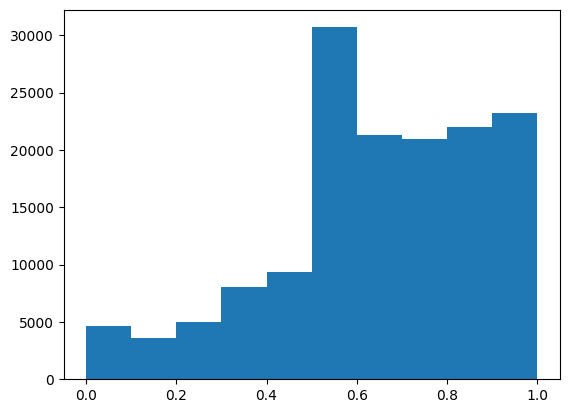

In [21]:
import matplotlib.pyplot as plt
plt.hist([row["quality"]["value"] for row in df["labels"] if "quality" in row])